<a href="https://www.kaggle.com/code/abhipatel2103/hyper-parameter-tuning-in-decision-tree?scriptVersionId=98780708" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="color:brown"> Basic Information about Decision Tree Classifier </h1>

   **Decision Tree is a type of Supervised Machine Learning where data is splitted according to parameters in the features and patterns are learned to perform classification on unknown data with same kind of distribution (Test data).**
   
 When applying decision tree with default hyper parameters, it splits until all patterns are learned in the training set. So that, tree get splited to N number of nodes and N number of depth. This leads to ***overfitting***. In other words, ***low bias and high variance***. Before going forward for hyper parameter tuning, familiarity of these terms is crucial. Let's get breif understanding.
***
* **Bias** - Performance of ML model on Training dataset (Known dataset). If models performs better on training data then bias of the model is `low`; otherwise, `High`
* **Variance** - Performance of ML model on Test dataset (Unknown dataset). If model performs better on test data then variance of the model is `low`; otherwise, `High`

In ideal condition, we need `low bias and low variance`. That means, model should perform well on both training(known) data and testing(unkown) data 

**Overfitting** - It is a situation when model gets trained so well on training set; that it over-learns patterns in training data and it can not generalize well on new(unkown) data. Hence, it does not perform better on testing data. In other words, overfitting is a situation of `low bias and high variance`.

In practical, overfitting can be identified by checking ***Train Accuracy and Test Accuracy***. If difference between training accuracy and testing accuracy is high, it indicates model is overfitting and will not perform well on unknown data. So, we will try to minimize this difference to overcome from overfitting and to make model perform well on unkown data.

> **By default, due to the nature of decision tree, it splits to N number of nodes and N number of depth which cause overfitting. That's why, Hyper-parameter tuning is necessary. So let's try to tune Decision Tree by taking example of Autism Dataset**

<div class="alert alert-block alert-success">
 <b>Tip:</b> I would strongly recommend to go through the videos and article mentioned in the reference section below to understand theory behind Decision Tree and some of the terms mentioned in this notebook like entropy and gini impurity; doing so will help to understand steps taken in this notebook more.
    
    
Also, if you want to just understanding hyper-parameter tuning then please jump direct to the <b>Model Training-(Decision Tree)</b> section.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/autism/train.csv')

**Predict whether a person has autism or not; using other dependent variables (Features)**


* `ID` - ID of the patient
* `A1_Score to A10_Score` - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
* `age` - Age of the patient in years
* `gender` - Gender of the patient
* `ethnicity` - Ethnicity of the patient
* `jaundice` - Whether the patient had jaundice at the time of birth
* `autism` - Whether an immediate family member has been diagnosed with autism
* `contry_of_res` - Country of residence of the patient
* `used_app_before` - Whether the patient has undergone a screening test before
* `result` - Score for AQ1-10 screening test
* `age_desc` - Age of the patient
* `relation` - Relation of patient who completed the test
* `Class/ASD` - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [4]:
df_train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


<AxesSubplot:>

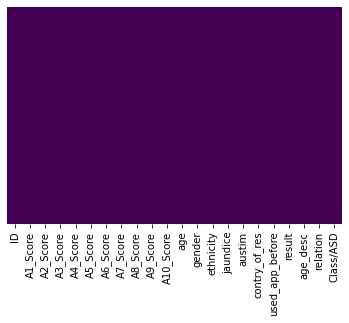

In [5]:
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis', yticklabels=False)

**Above heatmap, does not contains any strips with different color which show that columns does not contain any NaN values. But we still need to tackle for uknown values.**

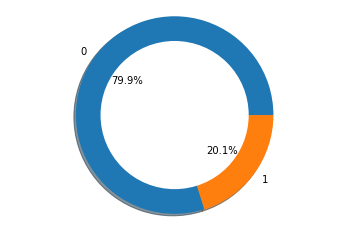

In [6]:
plt.pie(df_train['Class/ASD'].value_counts(), labels=[0,1], autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,facecolor='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

**It can be noticed from the above chart that, almost 80% instances are of label 0 [Autism = No] and 20% instances in the dataset are label 1 [Autism = Yes]**

In [7]:
df_train['Class/ASD'].value_counts()

0    639
1    161
Name: Class/ASD, dtype: int64

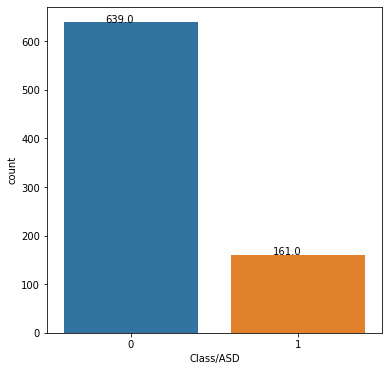

In [8]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Class/ASD', data = df_train)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#### This shows imbalanced dataset

In [9]:
df_train['gender'].value_counts()

m    530
f    270
Name: gender, dtype: int64

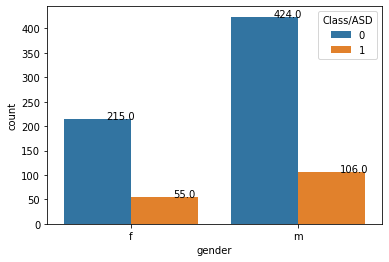

In [10]:
ax = sns.countplot(x='gender', data=df_train, hue='Class/ASD')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

**Instanced in the dataset has Total 270 females and 530 males From the above bar chart, it can be inferred that 20 % of total female has Autism and 20 % total male has Autism.**

In [11]:
print('Unique categories in categorical columns : -')
for col in df_train.columns:
    print(col,':')
    n = df_train[col].nunique()
    
    if n < 25:
        print(df_train[col].unique())

Unique categories in categorical columns : -
ID :
A1_Score :
[1 0]
A2_Score :
[0 1]
A3_Score :
[1 0]
A4_Score :
[0 1]
A5_Score :
[1 0]
A6_Score :
[0 1]
A7_Score :
[1 0]
A8_Score :
[0 1]
A9_Score :
[1 0]
A10_Score :
[1 0]
age :
gender :
['f' 'm']
ethnicity :
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
jaundice :
['no' 'yes']
austim :
['no' 'yes']
contry_of_res :
used_app_before :
['no' 'yes']
result :
age_desc :
['18 and more']
relation :
['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional']
Class/ASD :
[0 1]


In [12]:
# 'age_desc' column has only one value - ['18 and more']
# 'ID' column has all unique values and acting like an index. Hence, it can be removed

df_train.drop(['age_desc','ID'], axis=1, inplace= True)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


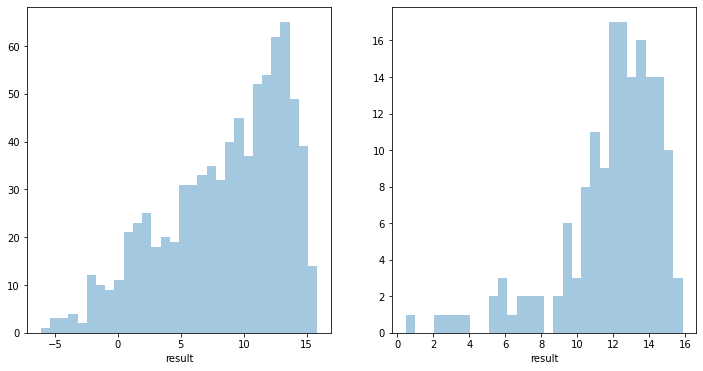

In [13]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.distplot(df_train['result'], ax= axes[0],bins=30, kde=False)
sns.distplot(df_train[df_train['Class/ASD'] == 1]['result'], ax= axes[1],bins=30, kde=False)
plt.show()

**Two histograms above shows frequency of values in two continuous columns - 'result' and 'age'.**

**Histogram on right shows frquency of ages of people that has Autism. it shows that people with age 25-35 has highest number of Autism**

**Histogram on left shows, what values of Result column has high chances of Autism. it shows, when the result value is between 11-14, the chances of having autism is higher**

Result - Score for AQ1-10 Screening test

<AxesSubplot:xlabel='age', ylabel='result'>

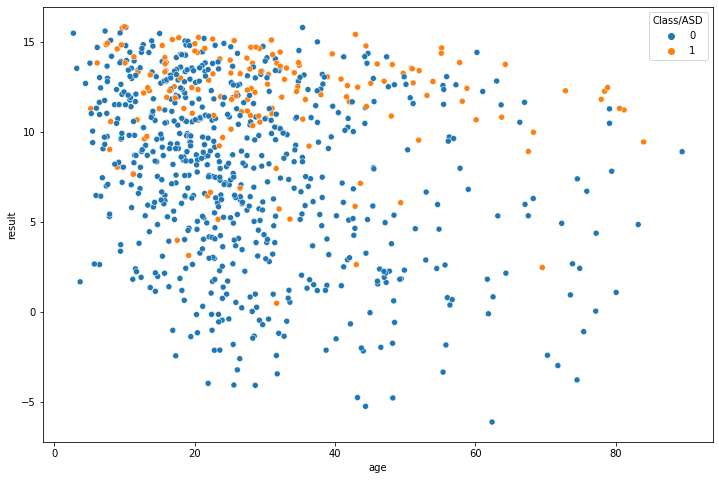

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='result', data=df_train, hue='Class/ASD')

<AxesSubplot:>

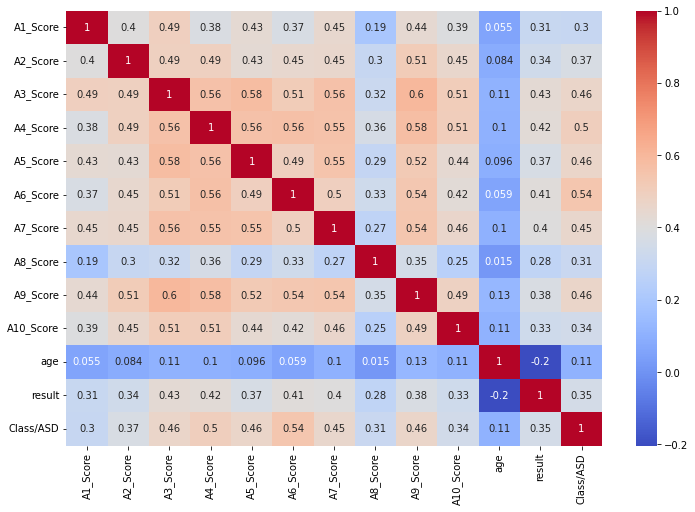

In [15]:
plt.figure(figsize=(12,8))

sns.heatmap(df_train.corr(), annot= True, cmap='coolwarm')

Above heatmap, show correlation of among columns. correlation values are between -1 to 1.

* Value near to 1 = higher positive correlation between both columns
* Value near to -1 = high negative correlation between both columns
* value near to 0 = less correlation between both columns

In [16]:
df_train.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


### Handling Outliers for continuous columns

1. **Age Column**

In [17]:
n = 0
for i in df_train['age']:
    q1 = df_train['age'].quantile(0.25)
    q3 = df_train['age'].quantile(0.75)
    iqr = q3 - q1
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    if i > upper_tail or i < lower_tail:
           n = n+1
            
print('Total number of outliers in Age column: ',n)

Total number of outliers in Age column:  35


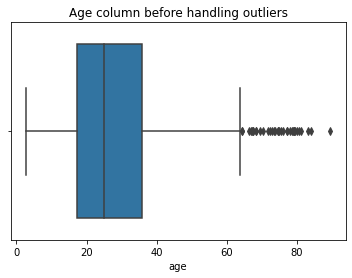

In [18]:
sns.boxplot(x='age', data= df_train)
plt.title('Age column before handling outliers')
plt.show()

**From boxplot above, it can be noticed that there are few outliers from 60 to 80 in Age column**

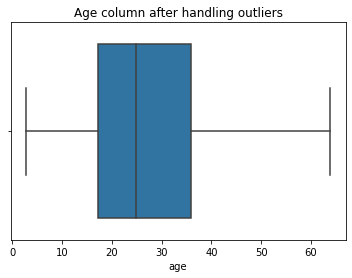

In [19]:
#Replacing uper outliers with upper_tail (q3 + 1.5 * iqr) of Age column
#Replacing lower outliers with mean of Age column
for i in df_train['age']:
    q1 = df_train['age'].quantile(0.25)
    q3 = df_train['age'].quantile(0.75)
    
    
    iqr = q3 - q1
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    if i > upper_tail or i < lower_tail:
        if i> upper_tail:
            df_train['age'] = df_train['age'].replace(i, upper_tail)
        else:
            df_train['age'] = df_train['age'].replace(i, np.mean(i))

sns.boxplot(x='age', data=df_train)
plt.title('Age column after handling outliers')
plt.show()

2. **'Result' Column**

In [20]:
n = 0
for i in df_train['result']:
    q1 = df_train['result'].quantile(0.25)
    q3 = df_train['result'].quantile(0.75)
    iqr = q3 - q1
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    

    if i > upper_tail or i < lower_tail:
        n = n+1
                        
print('Total number of outliers in result column: ',n)

Total number of outliers in result column:  1


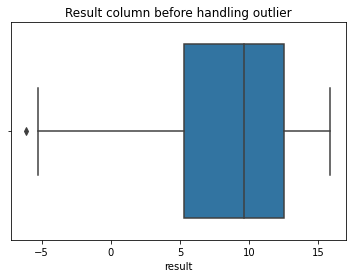

In [21]:
sns.boxplot(x='result', data= df_train)
plt.title('Result column before handling outlier')
plt.show()

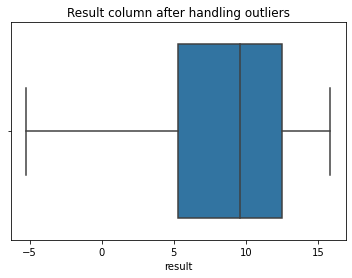

In [22]:
#Replacing upper outlier with 90th percentile of 'result' column (If any).
#Replacing lower outlier with 10th percentile of 'result' column (If any).
for i in df_train['result']:
    q1 = df_train['result'].quantile(0.25)
    q3 = df_train['result'].quantile(0.75)
    iqr = q3 - q1
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr

    if i > upper_tail or i < lower_tail:
        if i < lower_tail:
            df_train['result'] = df_train['result'].replace(i,df_train['result'].quantile(0.10) )
        else:
            df_train['result'] = df_train['result'].replace(i,df_train['result'].quantile(0.90) )
    
sns.boxplot(x='result', data=df_train)
plt.title('Result column after handling outliers')
plt.show()      

### Handling Missing Values

1. **Ethnicity Column**

In [23]:
df_train['ethnicity'].value_counts()

White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64

In [24]:
df_train['ethnicity'] = df_train['ethnicity'].replace(['?','others'],['Others','Others'])

**Above, replaced '?' and 'others' with 'Others' in 'ethnicity column'**

In [25]:
df_train['ethnicity'].value_counts()

White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: ethnicity, dtype: int64

2. **Relation column**

In [26]:
df_train['relation'].value_counts()

Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: relation, dtype: int64

In [27]:
df_train['relation'] = df_train['relation'].replace('?','Others')

**Above, replaced '?' with 'Others' in 'Relation' column**

3. **Country_of_res**

In [28]:
df_train['contry_of_res'].value_counts()

United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Spain                    10
France                   10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Italy                     6
Bahamas                   6
Malaysia                  6
Viet Nam                  5
Pakistan                  4
China                     4
Mexico                    4
Nicaragua                 4
Armenia                   4
Azerbaijan                4
Iraq                      4
Aruba                     4
Saudi Arabia              4
AmericanSamoa             4
Bolivia                   3
Serbia              

**Merging coutnries which are occurring less then 6 times into 'Other' category.**

In [29]:
occ = df_train['contry_of_res'].value_counts()
li_country = []
for i in occ.index:
    if occ[i] < 6:
        li_country.append(i)
print(li_country)

['Viet Nam', 'Pakistan', 'China', 'Mexico', 'Nicaragua', 'Armenia', 'Azerbaijan', 'Iraq', 'Aruba', 'Saudi Arabia', 'AmericanSamoa', 'Bolivia', 'Serbia', 'Ethiopia', 'Iceland', 'Germany', 'Ukraine', 'Niger', 'Cyprus', 'Sweden', 'Oman', 'Belgium', 'Romania', 'Burundi', 'Czech Republic', 'Egypt', 'Angola', 'Sierra Leone', 'Japan', 'Argentina', 'Tonga', 'Hong Kong', 'Bangladesh']


In [30]:
df_train.replace(li_country, 'Others', inplace= True)

In [31]:
df_train['contry_of_res'].value_counts()

United States           134
India                   108
Others                   84
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Kazakhstan               10
France                   10
Spain                    10
Ireland                   9
Iran                      8
Russia                    7
Malaysia                  6
South Africa              6
Italy                     6
Bahamas                   6
Name: contry_of_res, dtype: int64

### Seperating features and Target

In [32]:
train_feats = df_train.drop('Class/ASD', axis=1)
train_target = df_train['Class/ASD']

In [33]:
train_feats.shape, train_target.shape

((800, 19), (800,))

#### Creating two dataframes - String dataframe , Numeric dataframe

In [34]:
train_cat = train_feats.select_dtypes(include='object')
train_num = train_feats.select_dtypes(exclude='object')

In [35]:
train_cat.head()

,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,relation
0,f,Others,no,no,Austria,no,Self
1,m,Others,no,no,India,no,Self
2,m,White-European,no,yes,United States,no,Self
3,f,Others,no,no,United States,no,Self
4,m,Others,no,no,South Africa,no,Self


### Handling Categorical columns

**Machine Learning models can not understand input in String format. Therefore, we need to convert columns with String values into numeric representation. For that reason, We are using OneHotEncoding**

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
# Specified handle_unknown = 'ignore' because many times test dataset contains categories that model/transformer does not encountered in traing set while training.
# Therefore, it handles new categories encountered while transforming testing dataset.
enc = OneHotEncoder(handle_unknown = 'ignore')

train_cat_enc = enc.fit_transform(train_cat)

In [38]:
train_cat_enc.shape

(800, 47)

In [39]:
df_train_cat = pd.DataFrame(train_cat_enc.toarray())


In [40]:
df_train_cat.head()
# Converted String columns into numeric format

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Scaling Numeric Continuous columns

**Many times in Machine learning, some features contain high range of values and other features contain lower range of values. In this case, ML model gives more importance to features with high range of values and neglect features which has lower range of values even if these features are important. Hence, Scaling converts values of all features into same lower range which leads to optimal training and ML model can converge easily and efficiently**

**We are using MinMaxScaler that converts values of given features from 0 to 1.**

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_num[['age','result']])

In [43]:
df_train_scaled = pd.DataFrame(train_scaled, columns=['age','result'])

In [44]:
df_train_scaled.head()

,age,result
0,0.579812,0.550053
1,0.736445,0.356096
2,0.076239,0.952569
3,0.340869,0.357111
4,0.662121,0.023087


**Above dataframe shows that, values of age and result have been convert between 0 to 1**

### Merging dataframes together

In [45]:
train_num.drop(['age','result'], axis=1, inplace= True) # Removing old columns

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
df_train_num = pd.concat([train_num,df_train_scaled], axis=1)

In [47]:
df_train_num.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
0,1,0,1,0,1,0,1,0,1,1,0.579812,0.550053
1,0,0,0,0,0,0,0,0,0,0,0.736445,0.356096
2,1,1,1,1,1,1,1,1,1,1,0.076239,0.952569
3,0,0,0,0,0,0,0,0,0,0,0.340869,0.357111
4,0,0,0,0,0,0,0,0,0,0,0.662121,0.023087


**Merging categorical dataframe and numerical dataframe below**

In [48]:
df_train_final = pd.concat([df_train_num,df_train_cat], axis=1)

In [49]:
df_train_final.shape

(800, 59)

**Convert datatype of column name from int to String in order to avoid warnings**

In [50]:
col_name = list(df_train_final.columns)
col_name = [str(name) for name in col_name]
df_train_final.columns = col_name
print(df_train_final.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46'],
      dtype='object')


### Spliting Dataset into Train and test split

Splitting traing set and test test from 'df_train_final' dataframe

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_train_final, train_target, test_size=0.25, stratify=df_train['Class/ASD'], random_state=40)

In [53]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((600, 59), (600,), (200, 59), (200,))

# **Model Training - Decision Tree**

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

- ### **Default Hyper-parameters**

In [55]:
dt = DecisionTreeClassifier(random_state=42)
#dt = DecisionTreeClassifier(criterion='gini', splitter='best',ccp_alpha= 0.01,random_state=42)
dt.fit(X_train, y_train)
print('Train Accuracy: ', dt.score(X_train, y_train))

pred = dt.predict(X_test)

print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.77
f1 Score:  0.41025641025641024
Confusion Matrix:
  [[138  24]
 [ 22  16]]


<div class="alert alert-block alert-warning">
 <p style= "color:brown"}> ⬆️At first, if we check Train Accuracy is 1.0, it indicates model is 100 % accurate on train data(known data) which indicates Low Bias. However, Test Accuracy is 0.78 which indicates model is 78 % accurate on test data (unkown data) which indicates High Variance. High Difference between Train and test Accuracy shows model is <b>Overfitting.</b> In other words, <b>low bias and high variance</b></p>
</div>

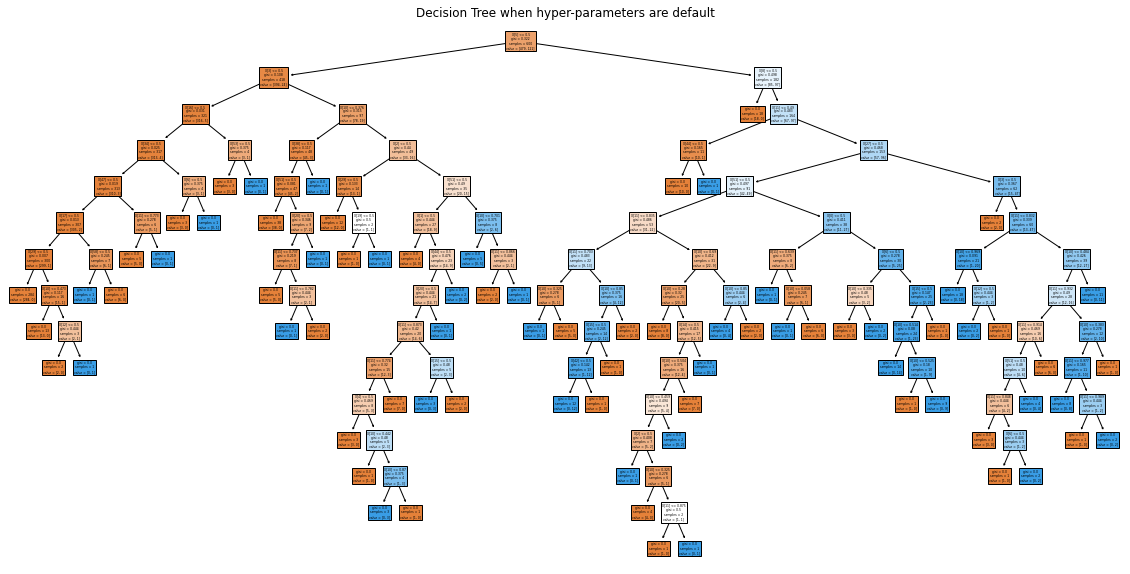

In [56]:
#Plotting tree which is trained on Training dataset. 
#sklearn provides 'tree' library which helps to plot trained tree easily

from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True)
plt.title('Decision Tree when hyper-parameters are default')
plt.show()

<p style='color:brown'><b>⬆️Plotted trained decision tree above. It can be seen that complex Tree has been created with default parameters even if our problem and dataset is not that much complex. Here, Decision Tree is trying to fit every single pattern of the training dataset and it is not trying to generalize. Therefore, it will not provide better results on unkown data. So, let's check some hyper parameter that can help us to tackle this issue.</b></p>

***Brief explaination of few hyper-parameters of decision tree (sk-learn)***

* `max_depth` = It helps to restrict depth of the tree. If set to 2, then Tree will be splitted to depth 2 (level 0,1 and 2). If set to None, then nodes are expanded until all leaves are pure. Restricting depth of the tree will stop Decision Tree to make over splits and over-learn training data which will handle overfitting.

* `max_samples_leaf` = We can specify minimum samples required to split node and create leaf nodes from it. For example, if it is set to 20, then splitting current node should have more than 20 samples in its child nodes. If not, then tree will not do split from that current node. This can again restrict size of the Tree and can help to handle overfitting.

* `ccp_alpha` = ccp stands for Cost Complexity Pruning. Pruning is a process of cutting weak nodes(nodes where we have less confidence) from the tree. ccp_alpha is a powerful hyperparameter and setting it appropiately can improve model performance significantly. 

**High value of ccp_alpha shows high amount of pruning and low values of ccp_alpha shows less amount of pruning.**

* `criterion` = This hyperparameter is also crucial and it does not help to handle overfitting. But, it helps to select order of features to split nodes on. Basically, we can calculate from several features which feature is best to split the current node on. This is important because we want to create a tree with smallest possible depth which is accurate as well as efficient due to small depth.

Three values that can be specified in criterion are: <code style="background:yellow;color:black">1) Gini 2) Entropy 3) log_loss</code>

*By default, `Gini impurity` is set in criterion hyperparameter because gini impurity is efficient than `Entropy`. The main reason behind this is, formula of Entropy contains Log calcualtions which generally takes time and formula of gini impurity contains simple calculation without Log calculations*

> <span style="font-size:22px; color:green"> Let's try these hyper-parameters one by one to check their individual impact.</span>

### 1.Hyper-parameter :  max_depth

In [57]:
#max_depth = 5
dt = DecisionTreeClassifier(max_depth=5, random_state=42) #Now we are specifying max_depth at the time of creating object of DecisionTreeClassifier
dt.fit(X_train, y_train)
print('Train Accuracy: ',dt.score(X_train, y_train))

pred = dt.predict(X_test)

print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))

Train Accuracy:  0.895
Test Accuracy:  0.82
f1 Score:  0.5
Confusion Matrix:
  [[146  22]
 [ 14  18]]


**⬆️Difference between Train and Test Accuracy is decreased**

*Let's check other value of max_depth*

In [58]:
#max_depth = 3
dt = DecisionTreeClassifier(max_depth=3, random_state=42) #Now we are specifying max_depth at the time of creating object of DecisionTreeClassifier
dt.fit(X_train, y_train)
print('Train Accuracy: ',dt.score(X_train, y_train))

pred = dt.predict(X_test)

print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))

Train Accuracy:  0.8633333333333333
Test Accuracy:  0.85
f1 Score:  0.6739130434782609
Confusion Matrix:
  [[139   9]
 [ 21  31]]


<div class="alert alert-block alert-warning" style='color:brown'>⬆️ Now if we check train accuracy(0.86) and test accuracy (0.85), it can be inferred that difference between both accuracy is very less than before. Less differences shows model is not overfitting. Therefore, max_depth has handled overfitting.👍</div>

* <span style="font-size:17px;"> Also notice that, train accuracy is decreased then first model. But test accuracy has been increased in this model that means, at a cost of performing bit less accurate on known data, model is performing better on unkown data. And, that's the main aim of Machine Learning models -> [peforming better on unkown or new data]. </span>

* <span style="font-size:17px;"> In other words, increased test accuracy shows this model achieved low variance. Train accuracy is also good enough; hence, we can consider bias is also not very high; but low enough. </span>

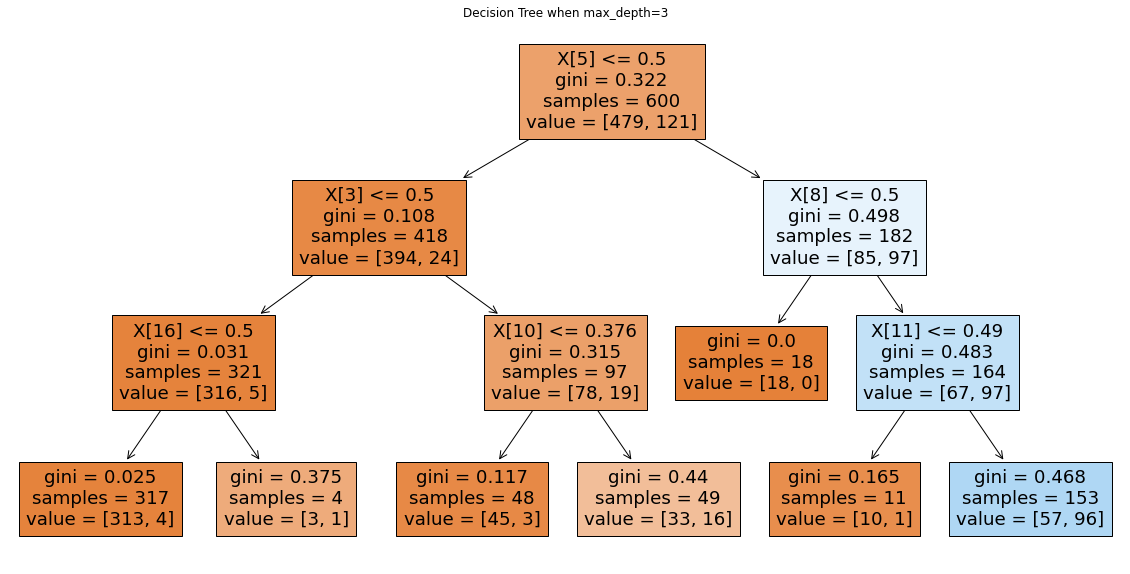

In [59]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True)
plt.title('Decision Tree when max_depth=3')

plt.show()

* <p style='color:brown'><b>⬆️Plotted tree above for max_depth=3. Root node is Level 0 and then tree is splitted to level 1,2 and 3. This Decision Tree is less complex and it gave better f1 score and confusion matrix.</b></p>

* <p style='color:brown'><b> F1-score is weighted average of Precision and Recall. F1-score is better performance measure than accuracy when classes in the Target are imbalanced.</b></p>

### 2.Hyper-parameter :  min_samples_leaf

In [60]:

dt = DecisionTreeClassifier(min_samples_leaf= 10, random_state=42) #Now we are specifying min_samples_leaf at the time of creating object of DecisionTreeClassifier
dt.fit(X_train, y_train)
print('Train Accuracy: ',dt.score(X_train, y_train))

pred = dt.predict(X_test)

print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))

Train Accuracy:  0.9016666666666666
Test Accuracy:  0.825
f1 Score:  0.4927536231884058
Confusion Matrix:
  [[148  23]
 [ 12  17]]


**⬆️Difference between Train and Test Accuracy is decreased. But it can be decreased more**

*Let's try another value for min_samples_leaf*


In [61]:
dt = DecisionTreeClassifier(min_samples_leaf= 30, random_state=42) #Now we are specifying min_samples_leaf at the time of creating object of DecisionTreeClassifier
dt.fit(X_train, y_train)
print('Train Accuracy: ',dt.score(X_train, y_train))

pred = dt.predict(X_test)

print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))

Train Accuracy:  0.8666666666666667
Test Accuracy:  0.89
f1 Score:  0.6857142857142857
Confusion Matrix:
  [[154  16]
 [  6  24]]


* <span style="font-size:17px;"> First, we kept `min_samples_leaf = 10`; that means, minimum 10 samples are required in child node to split current node and create leaf node from it. Then, we set `min_samples_leaf = 30`; that means, minimum 30 samples are required in child nodes to split current node and create leaf node from it. Increasing the value of min_samples_leaf limits the Decision tree more to split current nodes and create over child nodes. This way, over-training on train dataset can be restricted and overfitting can be handled. </span>

* <span style="font-size:17px;"> It can be seen that, when `min_samples_leaf =30`, difference between train and test accuracy is less and model is showing better result through `f1-score (0.68)` and balanced result on confusion matrix by performing well on both classes <b>[0->(No Autism) & 1-> (Yes Autism)].</b></span>

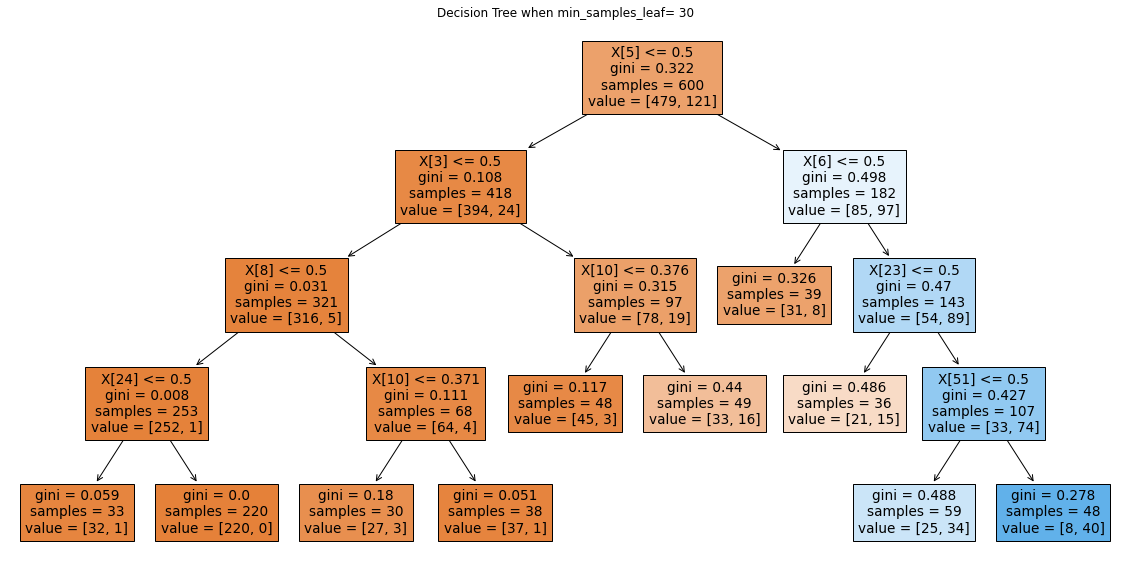

In [62]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True)
plt.title('Decision Tree when min_samples_leaf= 30')

plt.show()

<p style='color:brown'><b>⬆️ If we check leaf nodes of above plotted tree, samples in each leaf node are greater than 30 because we set hyper parameter min_samples_leaf = 30</b></p>

### 3.Hyper-parameter :  ccp_alpha (Cost Complexity Pruning)

* **Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.**

* `cost_complexity_pruning_path`  **method of DecisionTreeClassifier returns the effective alphas out of which one best alpha can be selected.**

In [63]:
dt = DecisionTreeClassifier(random_state=42)
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas , path.impurities

In [64]:
print(ccp_alphas) #effective values of alphas

[0.         0.00110741 0.00138889 0.00145833 0.00151515 0.00154762
 0.0015873  0.00159722 0.0016356  0.00173316 0.00198413 0.002
 0.00214286 0.00222222 0.00222222 0.0024     0.0025     0.00252525
 0.00277778 0.00277778 0.00285714 0.00293889 0.00299202 0.0030303
 0.00355556 0.00357143 0.00387778 0.00397849 0.00423461 0.0042517
 0.00428571 0.00441249 0.00563447 0.00651016 0.0080718  0.00984751
 0.01891383 0.09558042]


Now, we will train multiple Decision Tree Models by setting ccp_alphas values from above array as hyper parameter of classifiers and append each model in list `dts`

In [65]:
dts = []

for ccp in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha= ccp,random_state=42)
    dt.fit(X_train, y_train)
    dts.append(dt)

**Getting the Train Accuracy score and Test Accuracy Score of each model and saving scores in the corresponding lists**

In [66]:
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

#### Accuracy Vs Alphas for training and test sets 

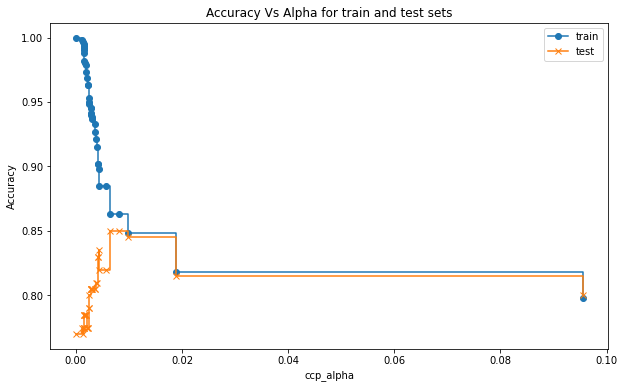

In [67]:

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('ccp_alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Vs Alpha for train and test sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='x', label='test',  drawstyle='steps-post')
ax.legend()
plt.show()

***Above line graph shows relation between training-test accuracy and CCP_alphas (Cost Complexity Pruning)***

1. <span style="font-size:16px;">As value of CCP_alpha is increasing, difference between training accuracy and testing accuracy is decreasing.
Less difference between both accuracy shows,  CCP_alpha is resolving the issue of overfitting by pruning the weak nodes of the Decision tree.</span>

2. <span style="font-size:16px;">It can be noticed that Decision Tree Classifier will generate optimal result by setting ccp_alpha value somewhere between 0.005 to 0.02 because Train accuracy and test accuracy is very near from each other and also bit higher than the accuracy when ccp_alpha is greater than 0.02.</span>


**Tried some ccp_alpha values between 0.005 and 0.02 and got best result on ccp_alpha=0.007**

In [68]:
dt = DecisionTreeClassifier(ccp_alpha= 0.007,random_state=42)
dt.fit(X_train, y_train)
print('Training Accuracy: ',dt.score(X_train, y_train))

pred = dt.predict(X_test)
print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))

Training Accuracy:  0.8633333333333333
Test Accuracy:  0.85
f1 Score:  0.6739130434782609
Confusion Matrix:
  [[139   9]
 [ 21  31]]


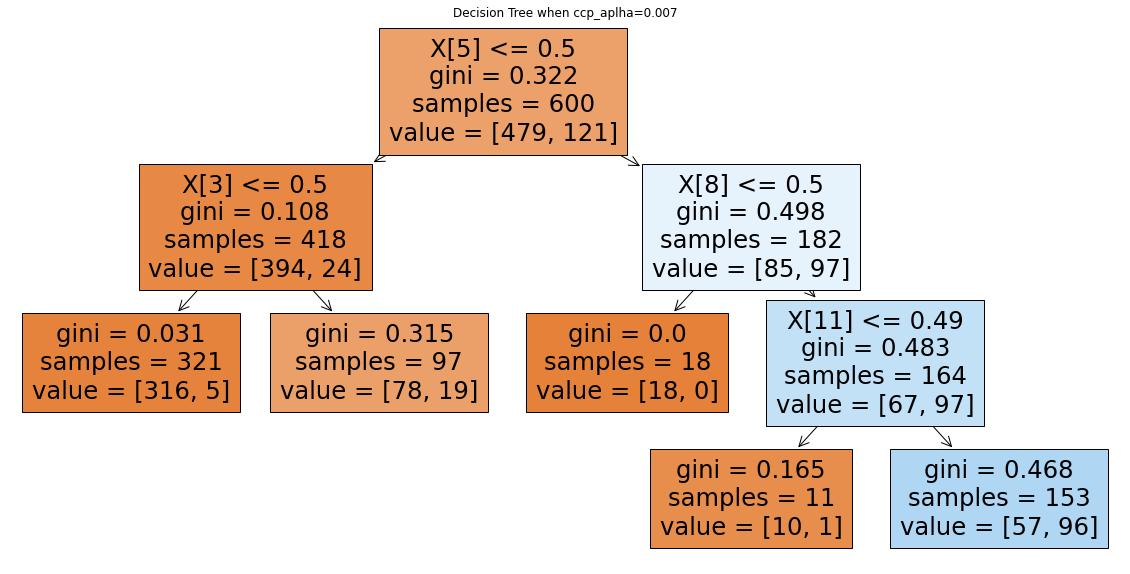

In [69]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True)
plt.title('Decision Tree when ccp_aplha=0.007')
plt.show()

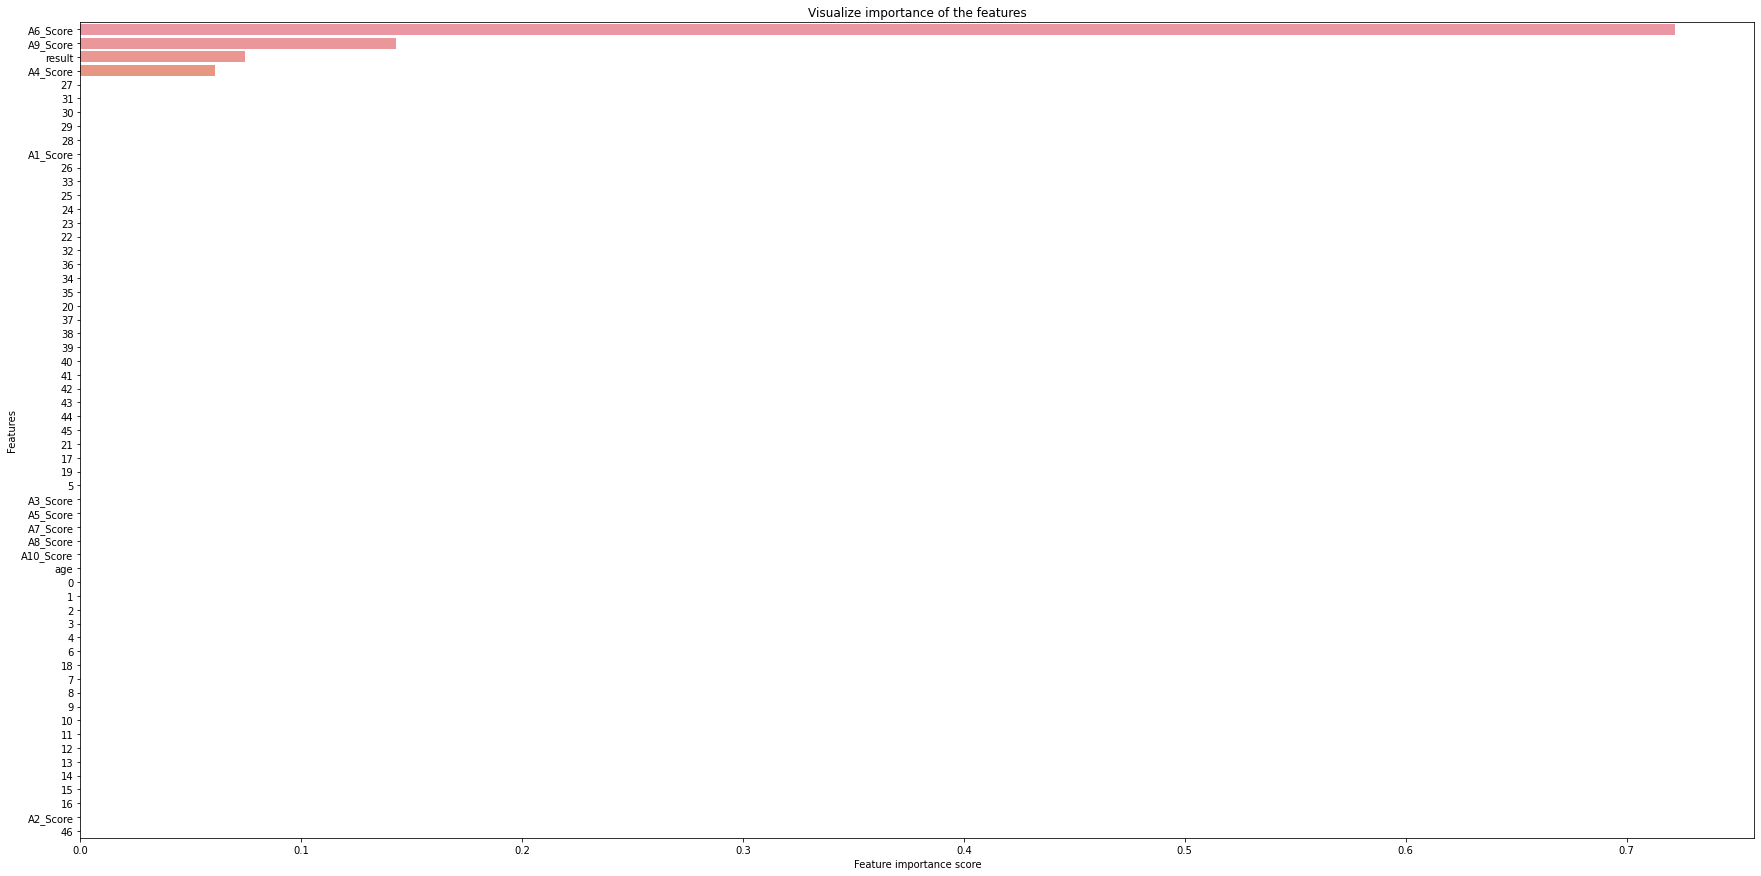

In [70]:
feature_scores = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending= False)

# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df_train)
ax.set_title("Visualize importance of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

* <span style='color:brown'><b>⬆️Above bar plot shows importance of each feature while training Decision Tree. It can be seen that only 4 feature were important while importance score for all other features are zero.</b></span>

* <span style='color:brown'><b> This is one of the advantages of Decision Tree that it can neglect features that are not important.</b></span>

***We can fine-tune Decision Tree to further select combination of best parameters***

### Fine-tuning using GridSearchCV

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
param = {'criterion': ['gini','entropy'], 
             'min_samples_leaf':[20,25,30,35,40],
             'ccp_alpha':[0.002,0.005,0.007,0.009,0.01,0.02],
             'min_samples_split':[2,3,4,5,6]}

dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)

In [73]:
tune_dt = RandomizedSearchCV(dt, param, verbose=1,scoring='f1')
tune_dt

RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'ccp_alpha': [0.002, 0.005, 0.007,
                                                      0.009, 0.01, 0.02],
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [20, 25, 30, 35,
                                                             40],
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   scoring='f1', verbose=1)

In [74]:
tune_dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'ccp_alpha': [0.002, 0.005, 0.007,
                                                      0.009, 0.01, 0.02],
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [20, 25, 30, 35,
                                                             40],
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   scoring='f1', verbose=1)

In [75]:
print('Best hyper-parameter selected by GridSearchCV: \n',tune_dt.best_params_)
print()
print('Best Score by GridSearchCV: ', tune_dt.best_score_)


Best hyper-parameter selected by GridSearchCV: 
 {'min_samples_split': 3, 'min_samples_leaf': 20, 'criterion': 'entropy', 'ccp_alpha': 0.007}

Best Score by GridSearchCV:  0.6668795093795093


In [76]:
print('Training Accuracy: ',tune_dt.score(X_train, y_train))

pred = tune_dt.predict(X_test)
print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))

Training Accuracy:  0.7025316455696202
Test Accuracy:  0.825
f1 Score:  0.6534653465346534
Confusion Matrix:
  [[132   7]
 [ 28  33]]


**😔Unfortunately, Fine Tuning with RandomizedSearchCV couldn't generate as good result as tuning hyper parameters manually.**

However at last, we got some familiarity with hyper-parameters of Decision Tree Classifier and some basic concepts of Machine learning such as overfitting, bias, variance and few more.

### Advantages:
1. Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
2. A decision tree does not require normalization of data.
3. A decision tree does not require scaling of data as well.
4. Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
5. A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.
6. One Deicison tree model is train, time to give predictions on new data is very less.

### Disadvantage:
1. A small change in the data can cause a large change in the structure of the decision tree causing instability.
2. For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
4. Decision tree often involves higher time to train the model.
5. Decision tree training is relatively expensive as the complexity and time has taken are more.
6. The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.



**I Hope you found this notebook userful and enjoyable.**

<span style="font-size:16px;">😊Also, mention or discuss in comment section any other hyper-parameter of Decision Tree Classifier which is important but I haven't explained in this notebook.</span>

**Thank you**

<div class="alert alert-block alert-info" style='color:black'>
<b>Tip:</b> I would strongly recommend to go through the videos and article mentioned in the reference below to understand theory behind Decision Tree and some of the terms mentioned in this notebook like entropy and gini impurity; doing so will help to understand steps taken in this notebook more.
</div>

***Reference:***

https://www.youtube.com/watch?v=_L39rN6gz7Y

https://www.youtube.com/watch?v=1IQOtJ4NI_0

https://www.youtube.com/watch?v=5aIFgrrTqOw

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

https://dhirajkumarblog.medium.com/top-5-advantages-and-disadvantages-of-decision-tree-algorithm-428ebd199d9a